<a href="https://colab.research.google.com/github/zahoororakzai11/machine-learning/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning Project overflow:
How Ml Project is go through the process

In [ ]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/sample_data/data.csv')
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
X = df.iloc[:,:-1].values
#dependent variable y
Y = df.iloc[:,3].values

In [ ]:
df.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [ ]:
#filling Missing values with help of SimpeImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ='mean')
imputer = imputer.fit(X[:,1:3])
X[:,1:3] = imputer.transform(X[:,1:3])

In [ ]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
def fill_missing_with_mean(df):
    """
    Fill missing values in a DataFrame with the mean of their respective columns.

    Parameters:
        data (DataFrame): The input DataFrame.

    Returns:
        DataFrame: The DataFrame with missing values filled using column means.
    """
    filled_data = df.fillna(df.mean())
    return filled_data


In [ ]:
# Fill missing values with column means
filled_data = fill_missing_with_mean(df)
print(filled_data)


   Country        Age        Salary Purchased
0   France  44.000000  72000.000000        No
1    Spain  27.000000  48000.000000       Yes
2  Germany  30.000000  54000.000000        No
3    Spain  38.000000  61000.000000        No
4  Germany  40.000000  63777.777778       Yes
5   France  35.000000  58000.000000       Yes
6    Spain  38.777778  52000.000000        No
7   France  48.000000  79000.000000       Yes
8  Germany  50.000000  83000.000000        No
9   France  37.000000  67000.000000       Yes


<ipython-input-10-54ee1fa15052>:13: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  filled_data = df.fillna(df.mean())


In [ ]:
#How to prepared Data for machine learning
#Preprocessing
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
X[:,0] = labelEncoder_X.fit_transform(X[:,0])

labelEncoder_Y = LabelEncoder()
Y  = labelEncoder_Y.fit_transform(Y)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
# One Hot Encoding : Give equal to every columns
# Converting Categorical into numeric creats Problem, creats ranking

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("Country",OneHotEncoder(),[0])],remainder= 'passthrough')
X = ct.fit_transform(X)

In [ ]:
#Feature Scaling
# Split the data into Training and Test Sets --> X_train X_test,y_train,y_test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
# Use stratified sampling(almost equal number of representation for each class)

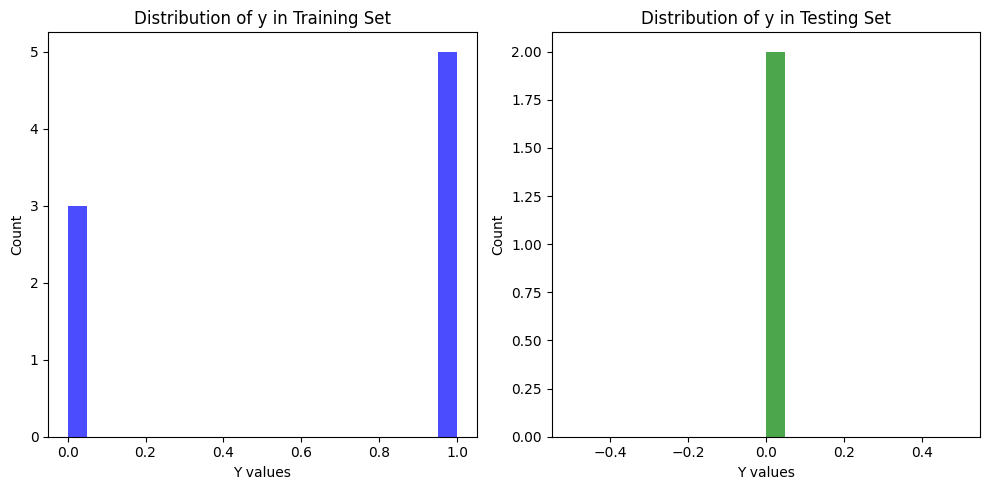

In [ ]:
# Visualize the distribution of the target variable (y) in the training and testing sets
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(Y_train, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of y in Training Set')
plt.xlabel('Y values')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(Y_test, bins=20, color='green', alpha=0.7)
plt.title('Distribution of y in Testing Set')
plt.xlabel('Y values')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:
#  For Feature Scaling Use: max-min Normalization(0-1)
# (x-mean/SD)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
print(X_train)
x_test = sc_x.transform(X_test)
print(X_test)

[[-1.          2.64575131 -0.77459667  0.26306757  0.12381479]
 [ 1.         -0.37796447 -0.77459667 -0.25350148  0.46175632]
 [-1.         -0.37796447  1.29099445 -1.97539832 -1.53093341]
 [-1.         -0.37796447  1.29099445  0.05261351 -1.11141978]
 [ 1.         -0.37796447 -0.77459667  1.64058505  1.7202972 ]
 [-1.         -0.37796447  1.29099445 -0.0813118  -0.16751412]
 [ 1.         -0.37796447 -0.77459667  0.95182631  0.98614835]
 [ 1.         -0.37796447 -0.77459667 -0.59788085 -0.48214934]]
[[0.0 1.0 0.0 30.0 54000.0]
 [0.0 1.0 0.0 50.0 83000.0]]


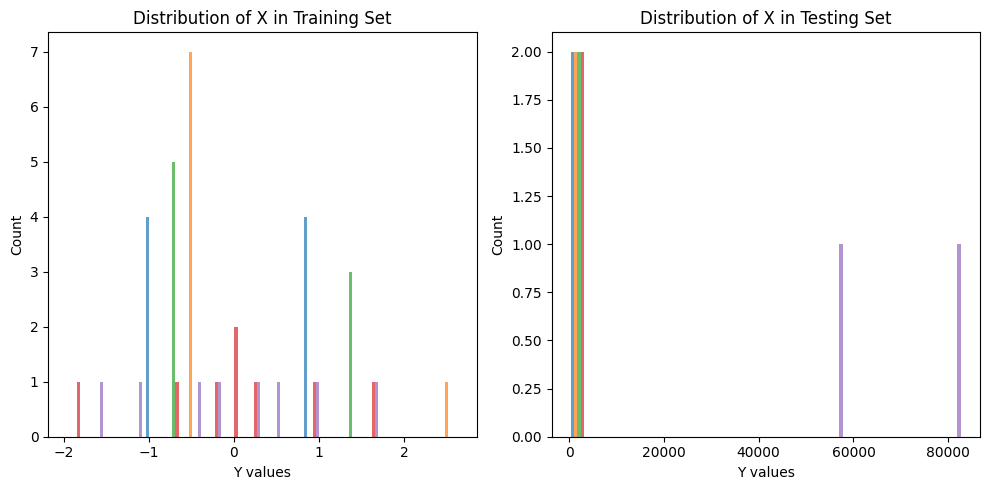

In [ ]:
# Visualize the distribution of the target variable (y) in the training and testing sets
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(X_train, bins=20, alpha=0.7)
plt.title('Distribution of X in Training Set')
plt.xlabel('Y values')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(X_test, bins=20, alpha=0.7)
plt.title('Distribution of X in Testing Set')
plt.xlabel('Y values')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Linear Regression on Diabetes Dataset

In [ ]:
#library
import pandas as pd
import numpy as np
#!pip install scikit-learn
from sklearn import datasets

In [ ]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame=True)
#Use only BMI feature
diabetes_X = diabetes_X.loc[:,['bmi']]

#BMI is zero-centered and normalized
diabetes_X = diabetes_X * 30 + 25

diabetes_X_train = diabetes_X.iloc[-20:]
diabetes_y_train = diabetes_y.iloc[-20:]


# Display some of the data points
pd.concat([diabetes_X_train, diabetes_y_train], axis=1).head()

,bmi,target
422,27.335902,233.0
423,23.811456,91.0
424,25.331171,111.0
425,23.779122,152.0
426,23.973128,120.0


Text(0, 0.5, 'Diabetes Risk')

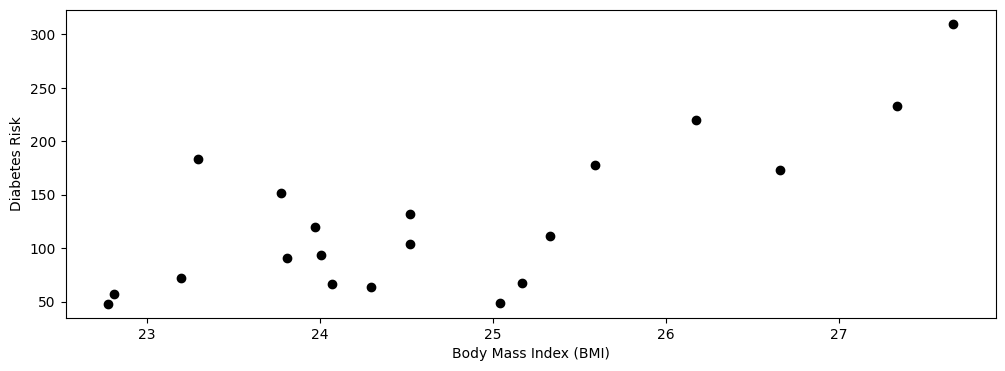

In [ ]:
# Can visualization two dimensional dataset
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

plt.scatter(diabetes_X_train, diabetes_y_train,  color='black')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')

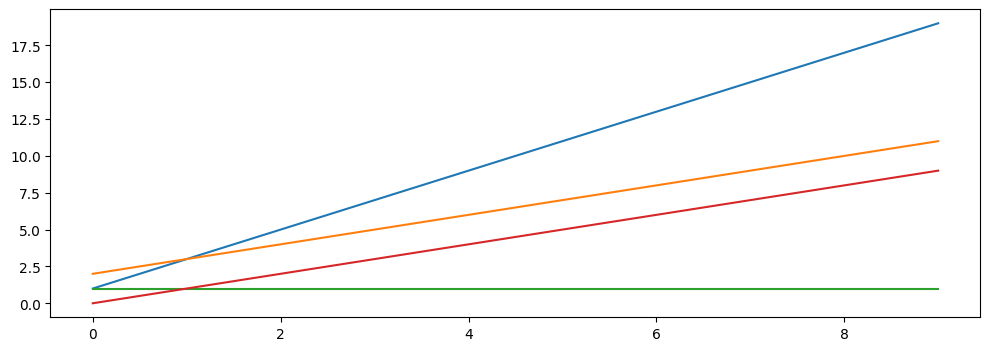

In [ ]:
theta_list = [(1, 2), (2,1), (1,0), (0,1)]
for theta0, theta1 in theta_list:
    x = np.arange(10)
    y = theta1 * x + theta0
    plt.plot(x,y)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train.values)

# Make predictions on the training set
diabetes_y_train_pred = regr.predict(diabetes_X_train)

# The coefficients
print('Slope (theta1): \t', regr.coef_[0])
print('Intercept (theta0): \t', regr.intercept_)

Slope (theta1): 	 37.378842160521195
Intercept (theta0): 	 -797.0817390343259


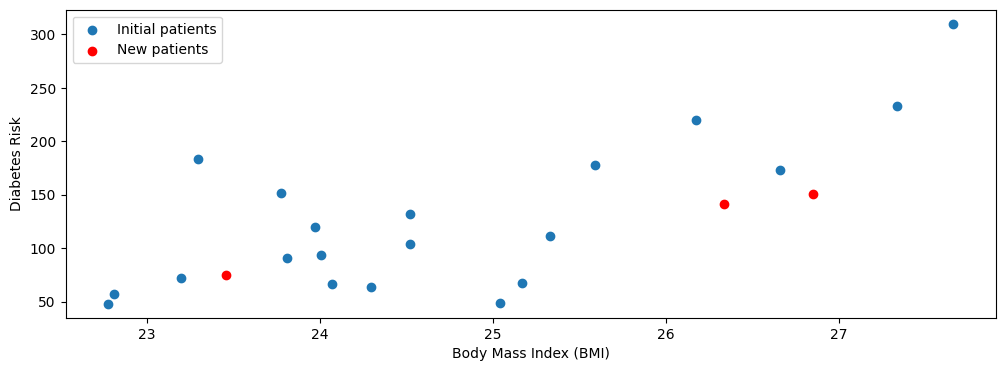

In [ ]:
# Collect 3 data points
diabetes_X_test = diabetes_X.iloc[:3]
diabetes_y_test = diabetes_y.iloc[:3]

plt.scatter(diabetes_X_train, diabetes_y_train)
plt.scatter(diabetes_X_test, diabetes_y_test,  color='red')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.legend(['Initial patients', 'New patients'])

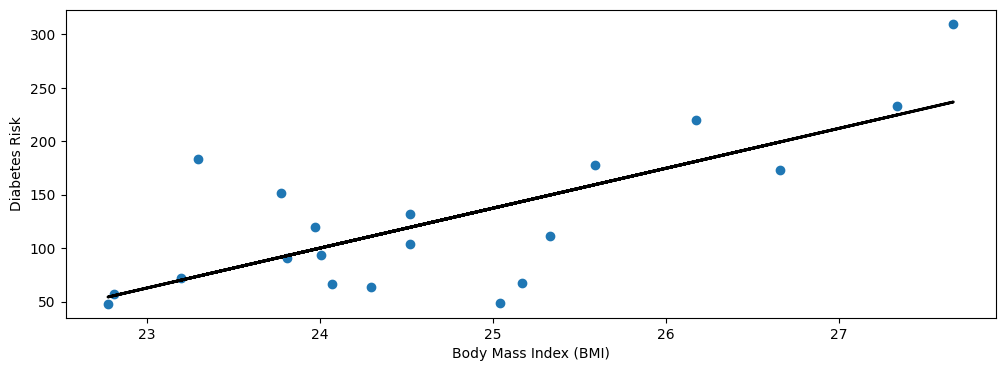

In [ ]:
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(diabetes_X_train, diabetes_y_train)
plt.plot(diabetes_X_train, diabetes_y_train_pred, color='black', linewidth=2)

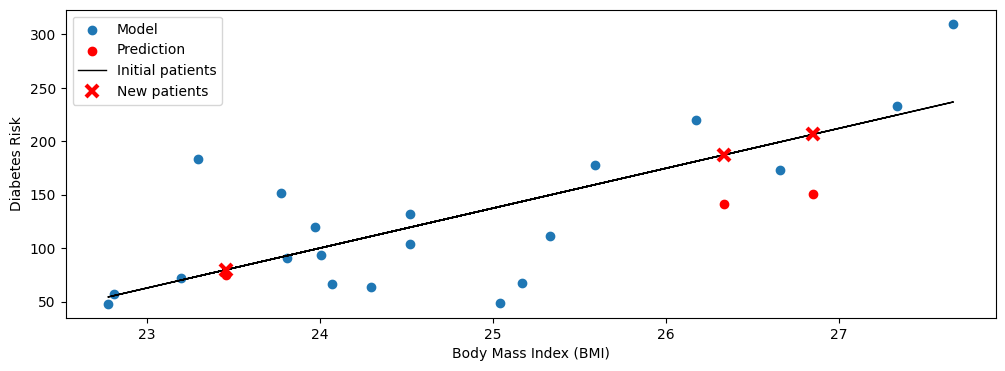

In [ ]:
# generate predictions on the new patients
diabetes_y_test_pred = regr.predict(diabetes_X_test)

# visualize the results
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(diabetes_X_train, diabetes_y_train)
plt.scatter(diabetes_X_test, diabetes_y_test, color='red', marker='o')
plt.plot(diabetes_X_train, diabetes_y_train_pred, color='black', linewidth=1)
plt.plot(diabetes_X_test, diabetes_y_test_pred, 'x', color='red', mew=3, markersize=8)
plt.legend(['Model', 'Prediction', 'Initial patients', 'New patients'])

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]
from sklearn import datasets

# Load the diabetes dataset
diabetes = datasets.load_diabetes(as_frame=True)
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
# Load the diabetes dataset
diabetes_X, diabetes_y = diabetes.data, diabetes.target

# Print part of the dataset
diabetes_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
diabetes_X.iloc[0]

age    0.038076
sex    0.050680
bmi    0.061696
bp     0.021872
s1    -0.044223
s2    -0.034821
s3    -0.043401
s4    -0.002592
s5     0.019907
s6    -0.017646
Name: 0, dtype: float64

In [ ]:
diabetes_X['old_man'] = (diabetes_X['sex'] > 0) & (diabetes_X['age'] > 0.05)
diabetes_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,old_man
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,False
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,False
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,True
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,False
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,False


<Axes: >

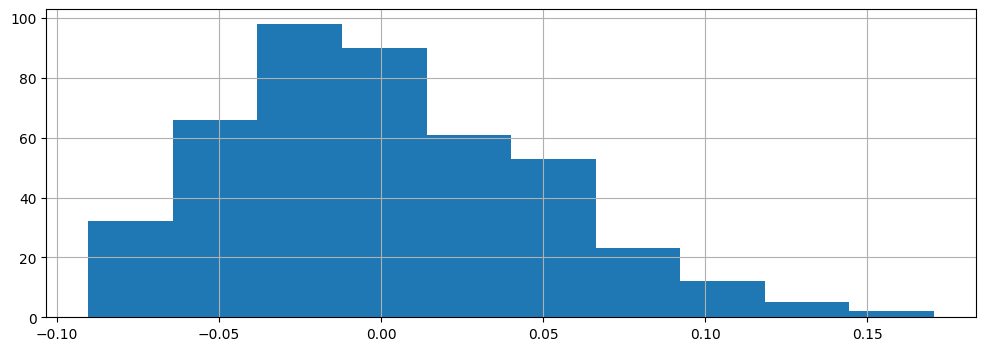

In [ ]:
diabetes_X.loc[:,'bmi'].hist()

[ 0.05068012 -0.04464164]


<Axes: >

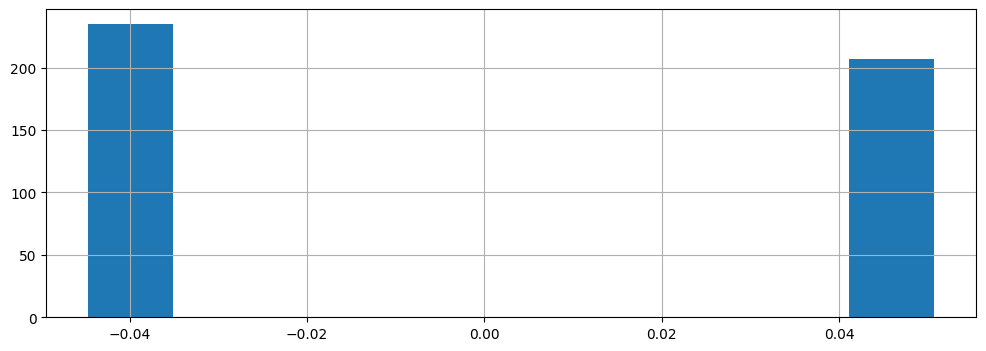

In [ ]:
print(diabetes_X.loc[:, 'sex'].unique())
diabetes_X.loc[:, 'sex'].hist()

<Axes: xlabel='Diabetes risk score', ylabel='Number of patients'>

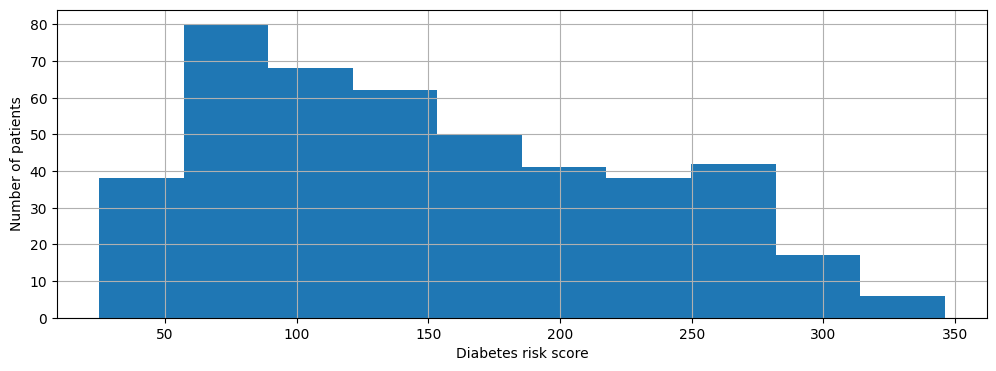

In [ ]:
plt.xlabel('Diabetes risk score')
plt.ylabel('Number of patients')
diabetes_y.hist()

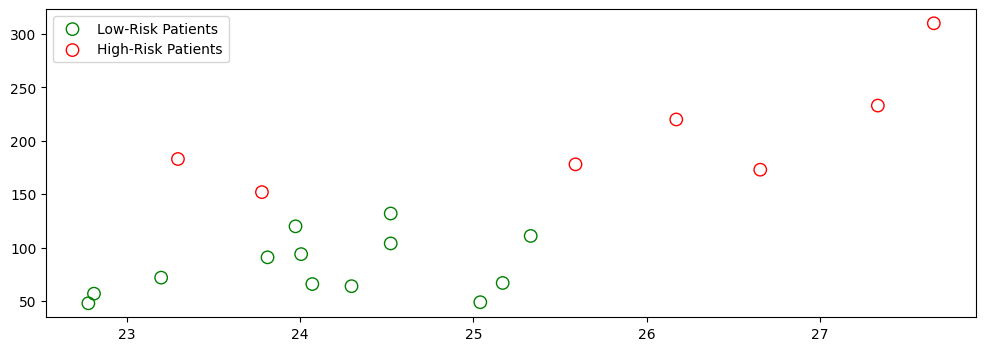

In [ ]:
# Discretize the targets
diabetes_y_train_discr = np.digitize(diabetes_y_train, bins=[150])

# Visualize it
plt.scatter(diabetes_X_train[diabetes_y_train_discr==0], diabetes_y_train[diabetes_y_train_discr==0], marker='o', s=80, facecolors='none', edgecolors='g')
plt.scatter(diabetes_X_train[diabetes_y_train_discr==1], diabetes_y_train[diabetes_y_train_discr==1], marker='o', s=80, facecolors='none', edgecolors='r')
plt.legend(['Low-Risk Patients', 'High-Risk Patients'])

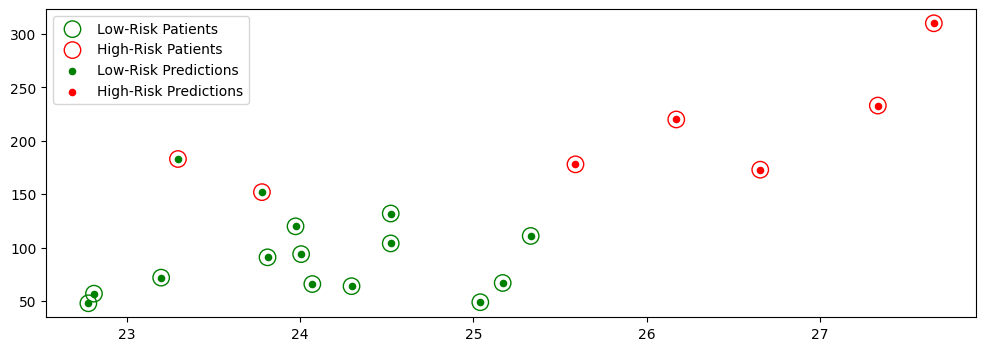

In [ ]:
# Create logistic regression object (note: this is actually a classification algorithm!)
clf = linear_model.LogisticRegression()

# Train the model using the training sets
clf.fit(diabetes_X_train, diabetes_y_train_discr)

# Make predictions on the training set
diabetes_y_train_pred = clf.predict(diabetes_X_train)

# Visualize it
plt.scatter(diabetes_X_train[diabetes_y_train_discr==0], diabetes_y_train[diabetes_y_train_discr==0], marker='o', s=140, facecolors='none', edgecolors='g')
plt.scatter(diabetes_X_train[diabetes_y_train_discr==1], diabetes_y_train[diabetes_y_train_discr==1], marker='o', s=140, facecolors='none', edgecolors='r')
plt.scatter(diabetes_X_train[diabetes_y_train_pred==0], diabetes_y_train[diabetes_y_train_pred==0], color='g', s=20)
plt.scatter(diabetes_X_train[diabetes_y_train_pred==1], diabetes_y_train[diabetes_y_train_pred==1], color='r', s=20)
plt.legend(['Low-Risk Patients', 'High-Risk Patients', 'Low-Risk Predictions', 'High-Risk Predictions'])


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y1 = np.array([1, 2, 3, 4])
y2 = np.array([-1, 1, 3, 5])

print('Mean squared error: %.2f' % mean_squared_error(y1, y2))
print('Mean absolute error: %.2f' % mean_absolute_error(y1, y2))

Mean squared error: 1.50
Mean absolute error: 1.00


In [ ]:
# Collect 20 data points for training
diabetes_X_train = diabetes_X.iloc[-20:]
diabetes_y_train = diabetes_y.iloc[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train.values)

# Make predictions on the training set
diabetes_y_train_pred = regr.predict(diabetes_X_train)

# Collect 3 data points for testing
diabetes_X_test = diabetes_X.iloc[:3]
diabetes_y_test = diabetes_y.iloc[:3]

# generate predictions on the new patients
diabetes_y_test_pred = regr.predict(diabetes_X_test)

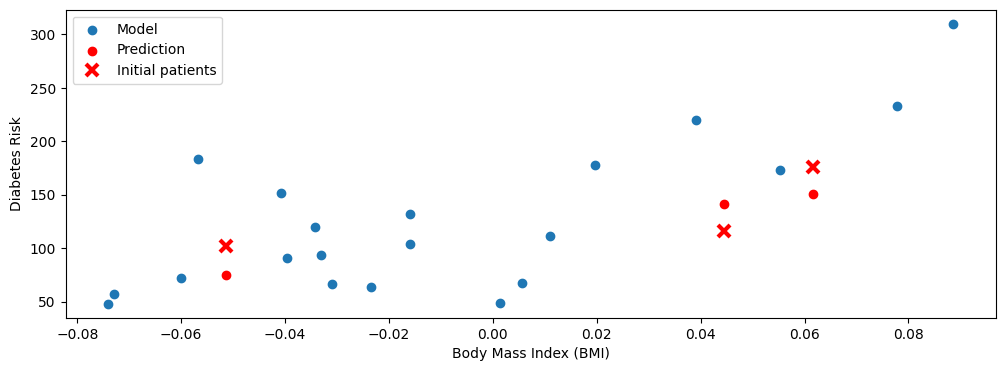

In [ ]:
# visualize the results
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(diabetes_X_train.loc[:, ['bmi']], diabetes_y_train)
plt.scatter(diabetes_X_test.loc[:, ['bmi']], diabetes_y_test, color='red', marker='o')
# plt.scatter(diabetes_X_train.loc[:, ['bmi']], diabetes_y_train_pred, color='black', linewidth=1)
plt.plot(diabetes_X_test.loc[:, ['bmi']], diabetes_y_test_pred, 'x', color='red', mew=3, markersize=8)
plt.legend(['Model', 'Prediction', 'Initial patients', 'New patients'])

In [ ]:
from sklearn.metrics import mean_squared_error

print('Training set mean squared error: %.2f'
      % mean_squared_error(diabetes_y_train, diabetes_y_train_pred))
print('Test set mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_test_pred))
print('Test set mean squared error on random inputs: %.2f'
      % mean_squared_error(diabetes_y_test, np.random.randn(*diabetes_y_test_pred.shape)))

Training set mean squared error: 1118.18
Test set mean squared error: 668.02
Test set mean squared error on random inputs: 16267.03
